In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [50]:
file_path = '../output/debug_5/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/debug_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

only_ls = [0.0] * len(criticality_prob_list)
ds = [0.0] * len(criticality_prob_list)
ds_iterative = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)
ours_iterative = [0.0] * len(criticality_prob_list)
ours_transform = [0.0] * len(criticality_prob_list)
ideal = [0.0] * len(criticality_prob_list)
increase = [0.0] * len(criticality_prob_list)
increase_abs = [0.0] * len(criticality_prob_list)


In [51]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_ls, core_ds, core_ds_iterative, core_ours, core_ours_iterative, core_ours_transform = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    only_ls[index] += core_ls
    ds[index] += core_ds
    ds_iterative[index] += core_ds_iterative
    ours[index] += core_ours
    ours_iterative[index] += core_ours_iterative
    ours_transform[index] += core_ours_transform
    ideal[index] += core_ls * ((criticality_prob_list[index])*1 + (1-criticality_prob_list[index])*2)

for index in range(len(only_ls)-1):
    # print((ours[index]-ideal[index]))
    # print((only_ls[index]-ideal[index]))
    increase[index] = (only_ls[index]-ours[index])/(only_ls[index]-ideal[index])
    increase_abs[index] = ours[index]/only_ls[index]-1
# increase[len(only_ls)-1] = 1.0
    
sum = 0
for index in range(len(only_ls)-1):
    sum += increase[index]
print(sum/(len(increase)-1))
print(increase_abs)

0.5598637210767086
[0.5354330708661419, 0.4232209737827717, 0.33712121212121215, 0.3120300751879699, 0.26136363636363624, 0.23574144486692017, 0.25, 0.23706896551724133, 0.1223628691983123, 0.07916666666666661, 0.0]


In [52]:
print(only_ls)
print(ds)
print(ds_iterative)
print(ours)
print(ours_iterative)
# print(ideal)
# print(increase)

[25.4, 26.7, 26.4, 26.6, 26.4, 26.3, 22.8, 23.2, 23.7, 24.0, 22.2]
[39.0, 37.4, 34.2, 33.8, 32.2, 29.6, 24.6, 25.5, 24.6, 23.9, 22.2]
[45.3, 40.7, 38.3, 36.5, 33.8, 29.0, 24.8, 25.6, 24.6, 24.5, 22.2]
[39.0, 38.0, 35.3, 34.9, 33.3, 32.5, 28.5, 28.7, 26.6, 25.9, 22.2]
[45.3, 41.4, 40.1, 37.8, 37.3, 31.8, 28.2, 28.9, 27.0, 26.2, 22.2]


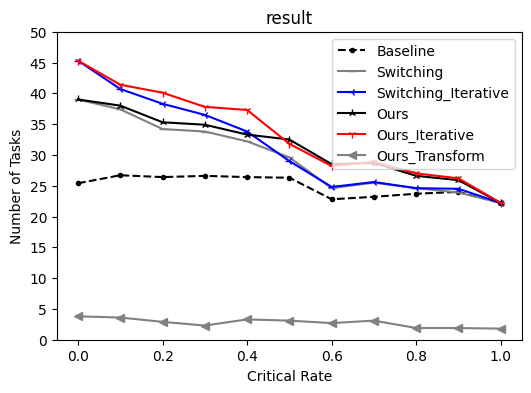

In [53]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, only_ls, label='Baseline', color='black', linestyle='dashed', marker='.')
plt.plot(criticality_prob_list, ds, label='Switching', color='gray', marker='_')
plt.plot(criticality_prob_list, ds_iterative, label='Switching_Iterative', color='blue', marker='3')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', marker='2')
plt.plot(criticality_prob_list, ours_iterative, label='Ours_Iterative', color='red', marker='1')
plt.plot(criticality_prob_list, ours_transform, label='Ours_Transform', color='gray', marker='<')
# plt.plot(criticality_prob_list, ideal, label='Ideal', color='lightgray', marker='.')

plt.title('result')
plt.xlabel('Critical Rate')
plt.ylabel('Number of Tasks')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylim(0,50)
plt.legend()
plt.show()